In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import integrate, signal, optimize
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
# import Taheri
df_taheri = pd.read_csv('Taheri-Araghi Data/taheri.csv', header=None)
df_taheri.columns = ['kappa', 'vol']

In [3]:
# import and calculate Si data
vol_exp = np.zeros(7)
kappa_exp = np.zeros(7)

for i in range(1,8): # six total nutrient conditions, skip first sheet because contains experimental info

    df = pd.read_excel('Si Data/mmc3.xlsx', sheet_name=i)
    birth_length = df['newborn size (micron)']
    width = df['cell width (micron)']
    volume = (birth_length - width) * np.pi * (width/2)**2 + (4/3) * np.pi * (width/2)**3
    vol_exp[i-1] = np.mean(volume)

    elong_rate = df['elongation rate (1/hour)']
    kappa_exp[i-1] = np.log(2) * np.mean(elong_rate)

# make new dataframe
df_kappa = pd.DataFrame(kappa_exp, columns=['kappa'])
df_vol = pd.DataFrame(vol_exp, columns=['vol'])
df_si = pd.concat([df_kappa,df_vol], axis=1, join='inner')

In [4]:
# combining dataframes
df = df_si.append(df_taheri).reset_index(drop=True)

Figure 2A Data

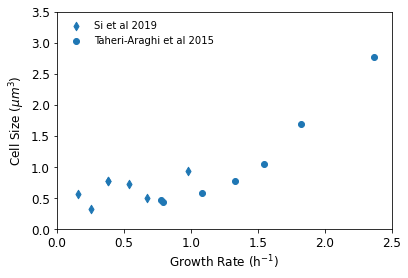

In [8]:
plt.rc('font', size=12) #controls default text size
plt.rc('legend', fontsize=10) #fontsize of the legend

fig = plt.figure()
plt.scatter(df_si['kappa'], df_si['vol'], color='tab:blue', marker='d', label='Si et al 2019')
plt.scatter(df_taheri['kappa'], df_taheri['vol'], label='Taheri-Araghi et al 2015')
plt.xlabel('Growth Rate (h$^{-1}$)')
plt.ylabel('Cell Size ($\mu m^3$)')
plt.xlim(0,2.5)
plt.ylim(0,3.5)
plt.legend(loc='upper left', frameon=False)
plt.show()

Figure 2B Data

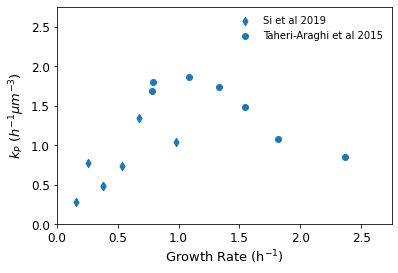

In [14]:
plt.rc('font', size=12) #controls default text size
plt.rc('legend', fontsize=10) #fontsize of the legend

plt.scatter(df_si['kappa'], df_si['kappa']/df_si['vol'], color='tab:blue', marker='d', label='Si et al 2019')
plt.scatter(df_taheri['kappa'], df_taheri['kappa']/df_taheri['vol'], label='Taheri-Araghi et al 2015')
plt.xlabel('Growth Rate (h$^{-1}$)', size=13)
plt.ylabel('$k_P$ $(h^{-1}\mu m^{-3})$', size=13)
plt.ylim(0,2.75)
plt.xlim(0,2.75)
plt.legend(loc='upper right', frameon=False)
plt.show()